In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import joblib 

In [2]:
df = pd.read_csv("farmer.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.to_csv('farmer.csv',index=False)

In [4]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [5]:
group = df.groupby('label')

In [6]:
group[['N']].mean()

,N
label,
apple,20.80
banana,100.23
blackgram,40.02
chickpea,40.09
coconut,21.98
coffee,101.20
cotton,117.77
grapes,23.18
jute,78.40


In [7]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [9]:
Nitrogen = group['N'].agg(min_nitro='min',max_nitro='max',avg_nitro='mean')
Nitrogen

,min_nitro,max_nitro,avg_nitro
label,,,
apple,0,40,20.80
banana,80,120,100.23
blackgram,20,60,40.02
chickpea,20,60,40.09
coconut,0,40,21.98
coffee,80,120,101.20
cotton,100,140,117.77
grapes,0,40,23.18
jute,60,100,78.40


In [10]:
Nitrogen.reset_index(inplace=True)

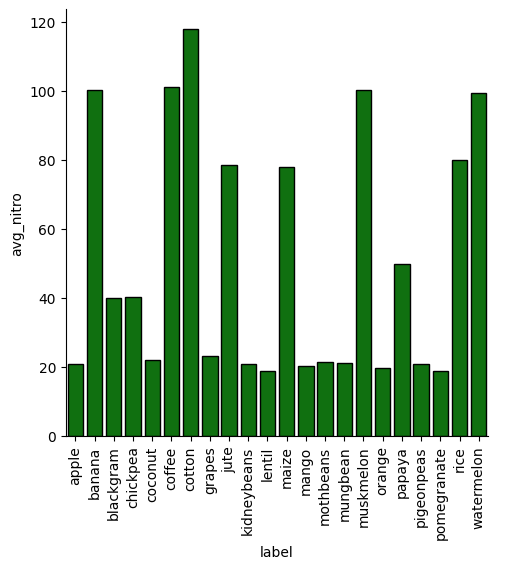

In [11]:
sns.catplot(x='label',y='avg_nitro',data=Nitrogen,kind='bar',ec='k',color='g')
plt.xticks(rotation=90)
plt.show()

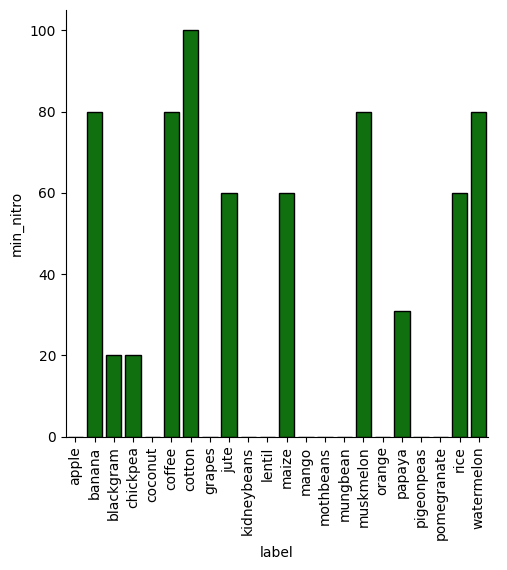

In [12]:
sns.catplot(x='label',y='min_nitro',data=Nitrogen,kind='bar',ec='k',color='g')
plt.xticks(rotation=90)
plt.show()

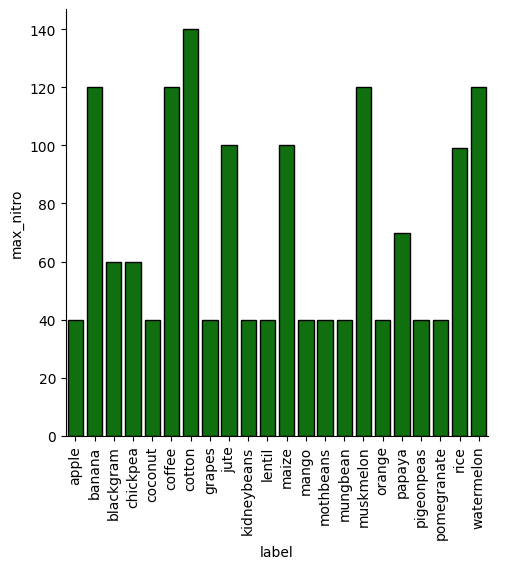

In [13]:
sns.catplot(x='label',y='max_nitro',data=Nitrogen,kind='bar',ec='k',color='g')
plt.xticks(rotation=90)
plt.show()

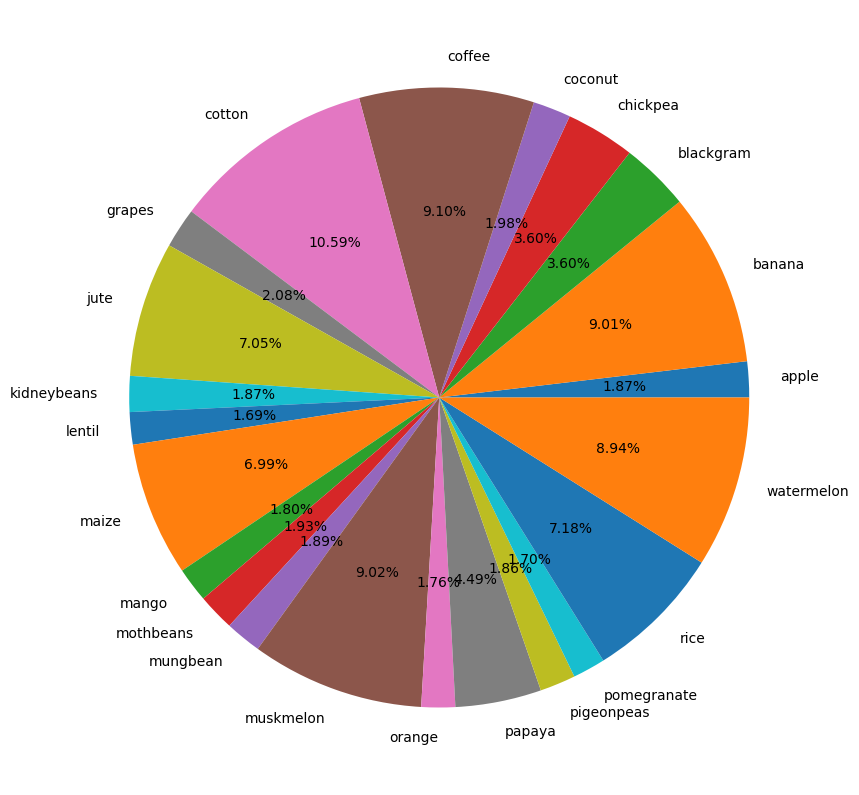

In [14]:
crops_label = list(Nitrogen['label'])
avg_nitrogen = list(Nitrogen['avg_nitro'])

plt.figure(figsize=(10,24))
plt.pie(avg_nitrogen,labels=crops_label,autopct='%2.2f%%')
plt.show()

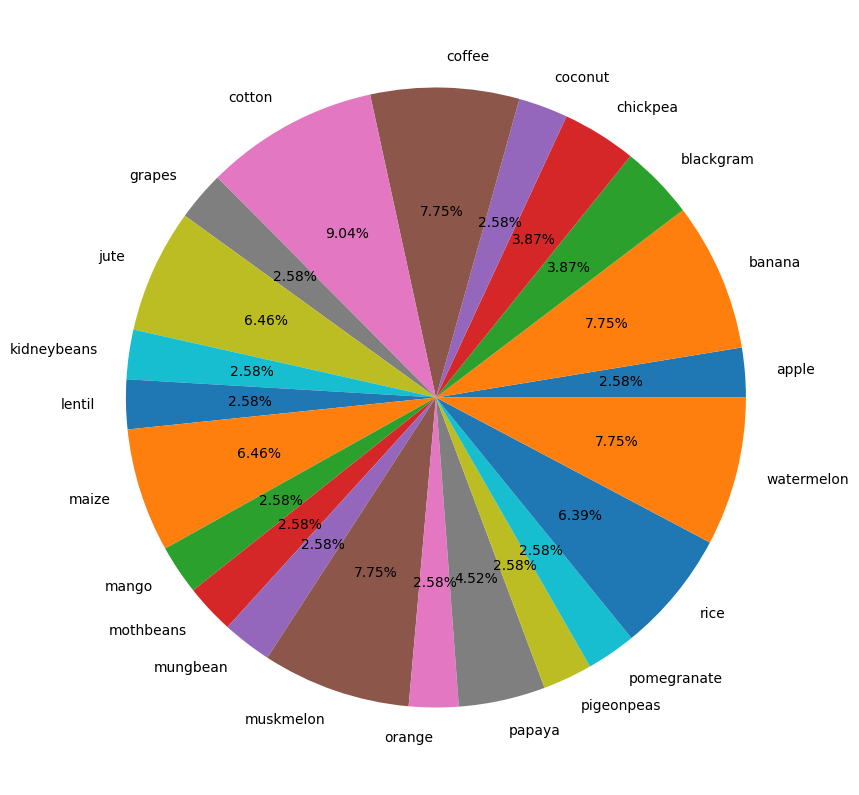

In [15]:
crops_label = list(Nitrogen['label'])
max_nitrogen = list(Nitrogen['max_nitro'])

plt.figure(figsize=(10,24))
plt.pie(max_nitrogen,labels=crops_label,autopct='%2.2f%%')
plt.show()

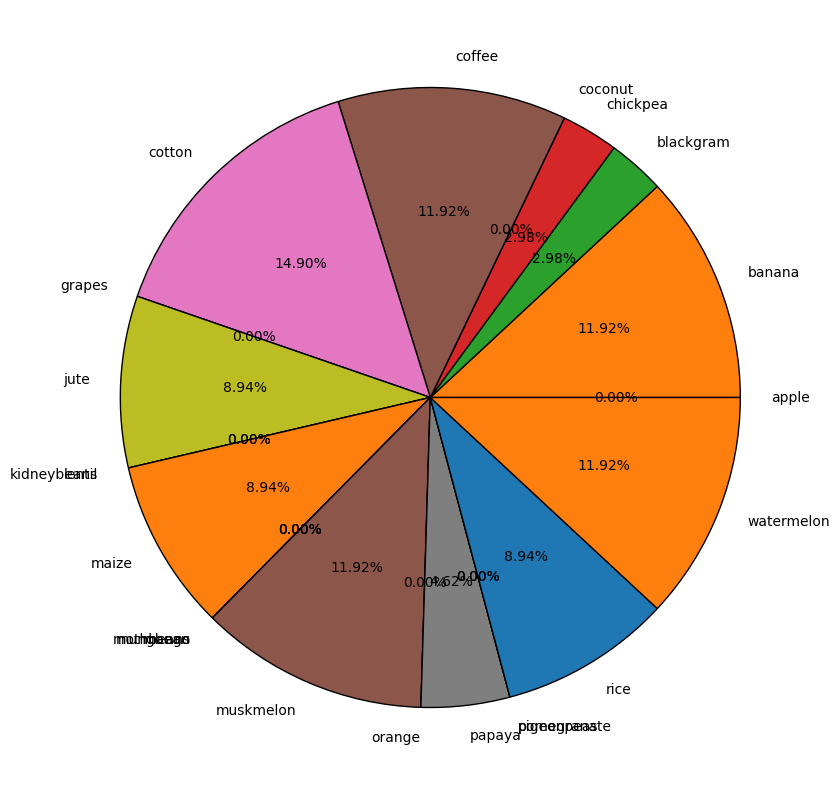

In [16]:
crops_label = list(Nitrogen['label'])
min_nitrogen = list(Nitrogen['min_nitro'])

plt.figure(figsize=(10,24))
plt.pie(min_nitrogen,labels=crops_label,autopct='%2.2f%%',wedgeprops={'ec':'k'})
plt.show()

In [17]:
x = df.drop('label',axis=1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [18]:
x.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64

In [19]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [20]:
df.duplicated().sum()

0

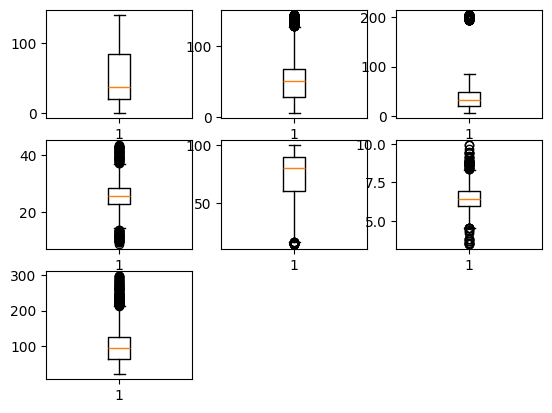

In [21]:
i = 1
for col in x.columns:
    plt.subplot(3,3,i)
    plt.boxplot(x[col])
    i+=1
plt.show()

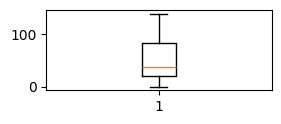

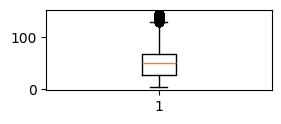

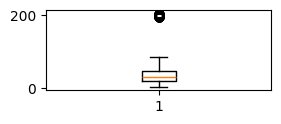

In [22]:
plt.subplot(4,2,1)
plt.boxplot(df['N'])
plt.show()

plt.subplot(4,2,2)
plt.boxplot(df['P'])
plt.show()

plt.subplot(4,2,3)
plt.boxplot(df['K'])
plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler , RobustScaler , StandardScaler , Normalizer
std = StandardScaler()

In [24]:
x_transform = std.fit_transform(x)

In [25]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [26]:
x_transform

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [27]:
x_transform.shape[0]

2200

In [28]:
x.shape[0]

2200

In [29]:
from sklearn.cluster import KMeans
KMeans = KMeans()
KMeans.fit(x_transform)

KMeans()

In [30]:
np.unique(KMeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [31]:
df['cluster_no'] = KMeans.labels_

In [32]:
group_6 =df[df['cluster_no']==4]
group_6['label'].unique()

array(['rice', 'pigeonpeas', 'papaya', 'jute', 'coffee'], dtype=object)

In [33]:
joblib.dump(KMeans,'kmodel.lb')
joblib.dump(std,'stds.lb')

['stds.lb']

In [34]:
from sklearn.metrics import silhouette_score
silhouette_score(x_transform,KMeans.labels_)

0.33772730894832237

In [47]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)